In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from prep import draw_tree
df = pd.read_csv('../data/iowa_train.csv')

In [4]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageCars,SalePrice
0,1,60,8450,7,5,2003,1710,856,854,1710,2,1,2,208500
1,2,20,9600,6,8,1976,1262,1262,0,1262,2,0,2,181500
2,3,60,11250,7,5,2001,1786,920,866,1786,2,1,2,223500
3,4,70,9550,7,5,1915,1717,961,756,1717,1,0,3,140000
4,5,60,14260,8,5,2000,2198,1145,1053,2198,2,1,3,250000


In [8]:
gbm = GradientBoostingRegressor()
tree = DecisionTreeRegressor(max_depth=3)

In [62]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [9]:
prediction = y.mean()

In [11]:
gradient = y - prediction

In [12]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
tree.predict(X)

array([ 13317.54887946, -56013.41752162,  13317.54887946, ...,
        67059.79160959, -56013.41752162, -56013.41752162])

In [14]:
prediction += tree.predict(X)

In [15]:
prediction

array([194238.74476987, 124907.77836879, 194238.74476987, ...,
       247980.9875    , 124907.77836879, 124907.77836879])

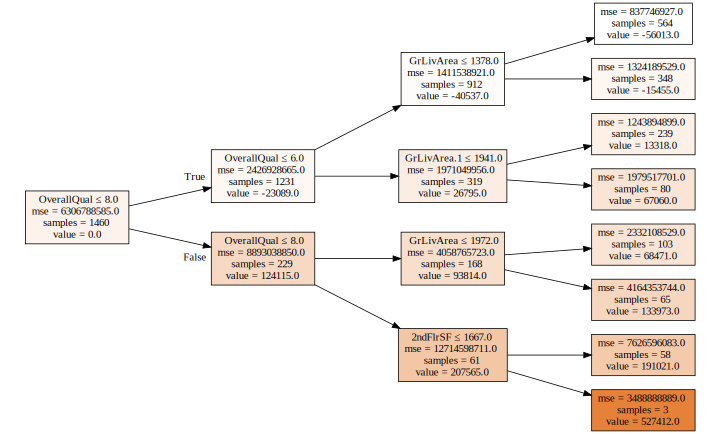

In [16]:
draw_tree(tree, X)

In [19]:
gradient = y - prediction

In [20]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
tree.predict(X)

array([ 3481.80411017,  3481.80411017,  3481.80411017, ...,
       41112.68911583,  3481.80411017,  3481.80411017])

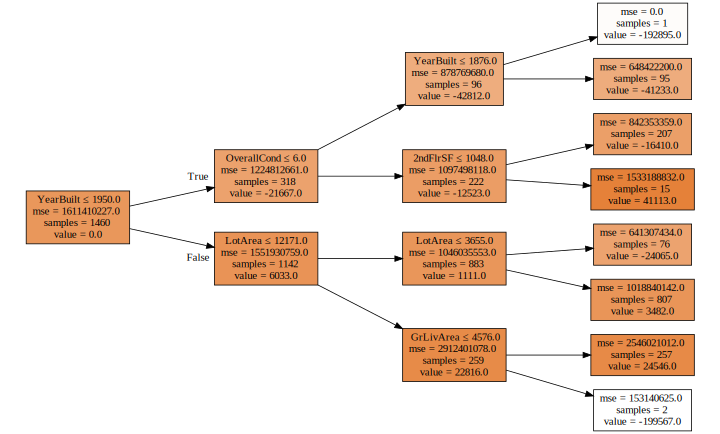

In [22]:
draw_tree(tree, X)

In [23]:
gradient

0       14261.255230
1       56592.221631
2       29261.255230
3      -54238.744770
4      -64894.553846
            ...     
1455     9533.910920
1456    44533.910920
1457    18519.012500
1458    17217.221631
1459    22592.221631
Name: SalePrice, Length: 1460, dtype: float64

In [24]:
prediction += tree.predict(X)*0.1

In [26]:
gradient = y - prediction

In [27]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
tree.predict(X)

array([-8642.66301841,  2598.39298121, -8642.66301841, ...,
       -8642.66301841,  2598.39298121,  2598.39298121])

In [29]:
gbm

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
gbm.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
gbm.score(X, y)

0.9371367715410339

In [32]:
naive_prediction = y.mean()

In [37]:
naive_model_cost = np.sum((y - naive_prediction)**2)

In [40]:
model_cost = np.sum((y - gbm.predict(X))**2)

In [42]:
1 - (model_cost/naive_model_cost)

0.9371367715410339

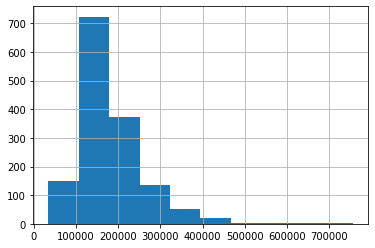

In [43]:
y.hist()

In [65]:
feats = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
})

In [73]:
query = feats.set_index('Column').sort_values(by='Importance', ascending=False)['Importance'] > .01

In [77]:
gbm.fit(X.loc[:, query], y).score(X.loc[:, query], y)

0.9377636242979969

In [51]:
gbm

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageCars,SalePrice
0,1,60,8450,7,5,2003,1710,856,854,1710,2,1,2,208500
1,2,20,9600,6,8,1976,1262,1262,0,1262,2,0,2,181500
2,3,60,11250,7,5,2001,1786,920,866,1786,2,1,2,223500
3,4,70,9550,7,5,1915,1717,961,756,1717,1,0,3,140000
4,5,60,14260,8,5,2000,2198,1145,1053,2198,2,1,3,250000


In [55]:
df['OverallQual'] = np.random.permutation(df['OverallQual'])

In [56]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageCars,SalePrice
0,1,60,8450,3,5,2003,1710,856,854,1710,2,1,2,208500
1,2,20,9600,7,8,1976,1262,1262,0,1262,2,0,2,181500
2,3,60,11250,4,5,2001,1786,920,866,1786,2,1,2,223500
3,4,70,9550,5,5,1915,1717,961,756,1717,1,0,3,140000
4,5,60,14260,6,5,2000,2198,1145,1053,2198,2,1,3,250000


In [57]:
X['OverallQual']  = np.random.permutation(df['OverallQual'])

In [58]:
gbm.predict(X)

array([185463.37419149, 193045.19266592, 206374.02868913, ...,
       246667.46398934, 130791.49374472, 141701.30444213])

In [60]:
0.9371367715410339 - gbm.score(X, y)

0.3441330305998387

In [78]:
gbm.n_estimators

100

In [79]:
gbm.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2114E8DCA98,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x2114E8DCA98,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='

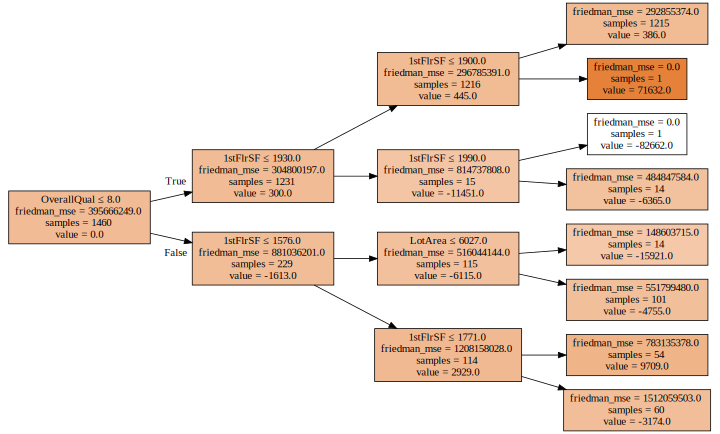

In [82]:
draw_tree(gbm.estimators_[-1][-1], X.loc[:, query])

In [86]:
learning_rates = [.001, .01, .1]
num_trees = [100, 500, 1000, 5000]
mod_scores = []

for rate in learning_rates:
    for tree in num_trees:
        gbm.set_params(n_estimators=tree, learning_rate=rate)
        gbm.fit(X, y)
        mod_score = gbm.score(X, y)
        mod_scores.append((mod_score, rate, tree))

In [87]:
max(mod_scores)

(0.9999822311160106, 0.1, 5000)

In [88]:
df = pd.read_csv('../data/iowa_train2.csv')

In [89]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice
0,1,60,RL,8450,CollgCr,7,5,2003,1710,856,854,1710,2,1,Attchd,2003.0,RFn,2,208500
1,2,20,RL,9600,Veenker,6,8,1976,1262,1262,0,1262,2,0,Attchd,1976.0,RFn,2,181500
2,3,60,RL,11250,CollgCr,7,5,2001,1786,920,866,1786,2,1,Attchd,2001.0,RFn,2,223500
3,4,70,RL,9550,Crawfor,7,5,1915,1717,961,756,1717,1,0,Detchd,1998.0,Unf,3,140000
4,5,60,RL,14260,NoRidge,8,5,2000,2198,1145,1053,2198,2,1,Attchd,2000.0,RFn,3,250000


In [98]:
df.loc[:, df.isnull().sum() > 0].isnull().corr()

,GarageType,GarageYrBlt,GarageFinish
GarageType,1.0,1.0,1.0
GarageYrBlt,1.0,1.0,1.0
GarageFinish,1.0,1.0,1.0


In [99]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [100]:
df.loc[:, df.isnull().sum() > 0]

,GarageType,GarageYrBlt,GarageFinish
0,Attchd,2003.0,RFn
1,Attchd,1976.0,RFn
2,Attchd,2001.0,RFn
3,Detchd,1998.0,Unf
4,Attchd,2000.0,RFn
...,...,...,...
1455,Attchd,1999.0,RFn
1456,Attchd,1978.0,Unf
1457,Attchd,1941.0,RFn
1458,Attchd,1950.0,Unf


In [101]:
def denote_null_values(df):
    empty_cols_query = df.isnull().sum() > 0
    empty_df_cols = df.loc[:, empty_cols_query].columns.tolist()
    for col in empty_df_cols:
        col_name = f"{col}_missing"
        df[col_name] = pd.isnull(df[col])
    return df

In [103]:
df = denote_null_values(df)

In [104]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,...,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice,GarageType_missing,GarageYrBlt_missing,GarageFinish_missing
0,1,60,RL,8450,CollgCr,7,5,2003,1710,856,...,2,1,Attchd,2003.0,RFn,2,208500,False,False,False
1,2,20,RL,9600,Veenker,6,8,1976,1262,1262,...,2,0,Attchd,1976.0,RFn,2,181500,False,False,False
2,3,60,RL,11250,CollgCr,7,5,2001,1786,920,...,2,1,Attchd,2001.0,RFn,2,223500,False,False,False
3,4,70,RL,9550,Crawfor,7,5,1915,1717,961,...,1,0,Detchd,1998.0,Unf,3,140000,False,False,False
4,5,60,RL,14260,NoRidge,8,5,2000,2198,1145,...,2,1,Attchd,2000.0,RFn,3,250000,False,False,False


In [107]:
pd.get_dummies(df)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,...,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,8450,7,5,2003,1710,856,854,1710,...,0,0,1,0,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1262,1262,0,1262,...,1,0,1,0,0,0,0,0,1,0
2,3,60,11250,7,5,2001,1786,920,866,1786,...,0,0,1,0,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1717,961,756,1717,...,0,0,0,0,0,0,1,0,0,1
4,5,60,14260,8,5,2000,2198,1145,1053,2198,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,1647,953,694,1647,...,0,0,1,0,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,2073,2073,0,2073,...,0,0,1,0,0,0,0,0,0,1
1457,1458,70,9042,7,9,1941,2340,1188,1152,2340,...,0,0,1,0,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1078,1078,0,1078,...,0,0,1,0,0,0,0,0,0,1


In [110]:
df['Neighborhood'].astype('category').cat.codes

0        5
1       24
2        5
3        6
4       15
        ..
1455     8
1456    14
1457     6
1458    12
1459     7
Length: 1460, dtype: int8

In [111]:
cat_cols = df.select_dtypes(include=np.object).columns.tolist()
df[cat_cols] = df[cat_cols].astype('category')
for col in cat_cols:
    df[col] = df[col].cat.codes

In [112]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,...,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice,GarageType_missing,GarageYrBlt_missing,GarageFinish_missing
0,1,60,3,8450,5,7,5,2003,1710,856,...,2,1,1,2003.0,1,2,208500,False,False,False
1,2,20,3,9600,24,6,8,1976,1262,1262,...,2,0,1,1976.0,1,2,181500,False,False,False
2,3,60,3,11250,5,7,5,2001,1786,920,...,2,1,1,2001.0,1,2,223500,False,False,False
3,4,70,3,9550,6,7,5,1915,1717,961,...,1,0,5,1998.0,2,3,140000,False,False,False
4,5,60,3,14260,15,8,5,2000,2198,1145,...,2,1,1,2000.0,1,3,250000,False,False,False


In [113]:
gbm.score(X, y)

0.9999822311160106

In [114]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageCars
0,1,60,8450,7,5,2003,1710,856,854,1710,2,1,2
1,2,20,9600,6,8,1976,1262,1262,0,1262,2,0,2
2,3,60,11250,7,5,2001,1786,920,866,1786,2,1,2
3,4,70,9550,7,5,1915,1717,961,756,1717,1,0,3
4,5,60,14260,8,5,2000,2198,1145,1053,2198,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,1647,953,694,1647,2,1,2
1456,1457,20,13175,6,6,1978,2073,2073,0,2073,2,0,2
1457,1458,70,9042,7,9,1941,2340,1188,1152,2340,2,0,1
1458,1459,20,9717,5,6,1950,1078,1078,0,1078,1,0,1


In [115]:
X_train, X_val, y_train, y_val = X[:1100].copy(), X[1100:].copy(), y[:1100].copy(), y[1100:].copy()

In [117]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
gbm.score(X_val, y_val)

0.8617092974160676